In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

trainset: (60000, 28, 28)
testset: (10000, 28, 28)


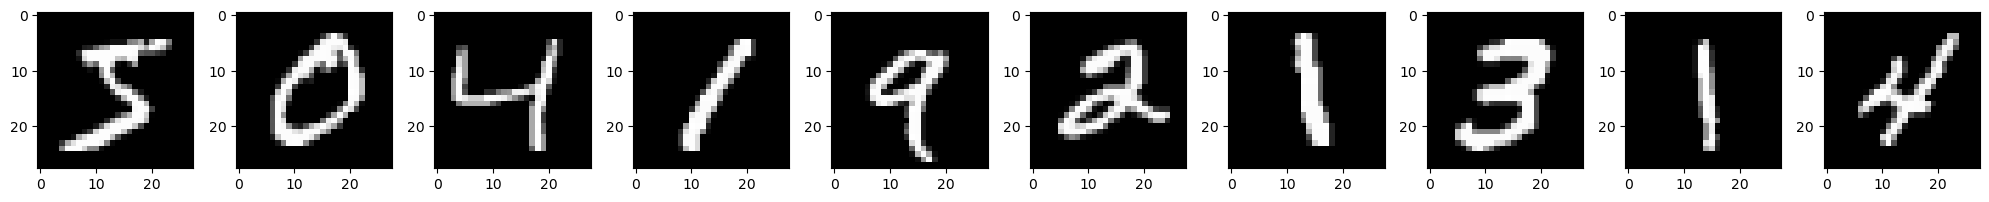

In [4]:


# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()
     


In [7]:

# Configuration des couches du réseau
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    # keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [8]:

# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=10)
     

Epoch 1/10


1875/1875 [==============================] - 13s 6ms/step - loss: 0.1367 - accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0442 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0105 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step -

In [9]:

# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9916
Test accuracy: 0.991599977016449


In [11]:

# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

313/313 [==============================] - 1s 4ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [14]:
import pickle

# open a file, where you ant to store the data
file = open('../trained_model/mnist_digit', 'wb')

# dump information to that file
pickle.dump(prediction_model, file)

# close the file
file.close()
